In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import scipy.stats as sps

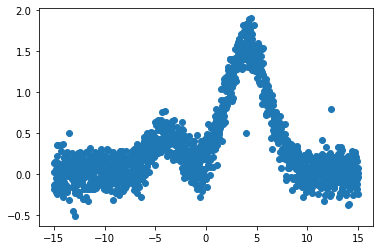

In [4]:
dataset = np.loadtxt("Problem_23/Problem_23_file_001.dat", delimiter="\t")
x = dataset[:, 0]
y = dataset[:, 1]

<IPython.core.display.Javascript object>


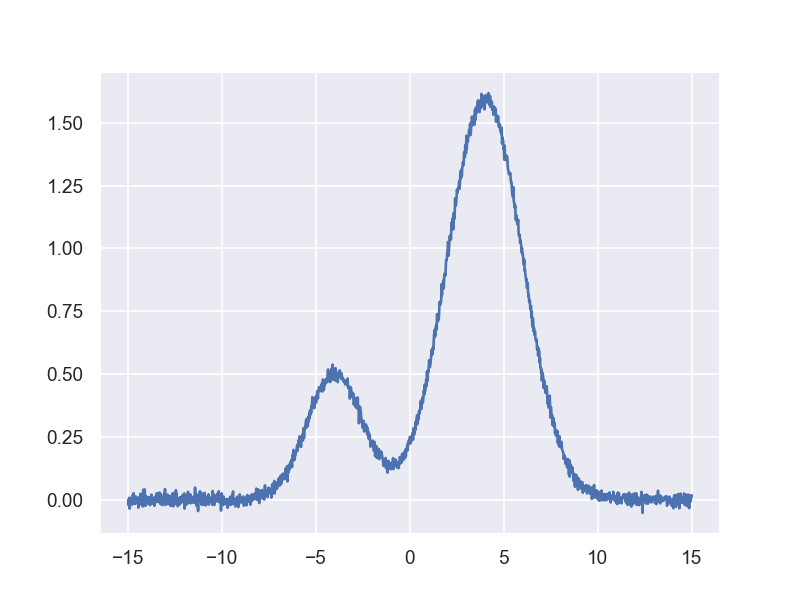

In [41]:
%matplotlib notebook
sns.set_theme()

X = []
Y = []
for file in os.listdir('Problem_23/'):
    dataset = np.loadtxt(os.path.join("Problem_23/", file), delimiter="\t")
    X.append(dataset[:, 0])
    Y.append(dataset[:, 1])
Y = np.mean(np.array(Y), axis=0)
X = np.mean(np.array(X), axis=0)

plt.plot(X, Y)

In [84]:
def lorenz2(x, A1, A2, gamma1, gamma2, mu1, mu2):
    return A1 * gamma1**2 / ((x - mu1)**2 + gamma1**2) + A2 * gamma2**2 / ((x - mu2)**2 + gamma2**2)

def gauss2(x, A1, A2, sigma1, sigma2, mu1, mu2):
    return A1 * np.exp(-(x - mu1)**2 / (2 * sigma1**2)) + A2 * np.exp(-(x - mu2)**2 / (2 * sigma2**2))
                                                                     
def gausslorenz(x, A1, A2, sigma, gamma, mu1, mu2):
     return A1 * np.exp(-(x - mu1)**2 / (2 * sigma**2)) + A2 * gamma**2 / ((x - mu2)**2 + gamma**2)

In [85]:
from scipy.optimize import curve_fit
lorenz_coef, lorenz_cov = curve_fit(lorenz2, x, y)
gauss_coef, gauss_cov = curve_fit(gauss2, x, y)

<IPython.core.display.Javascript object>


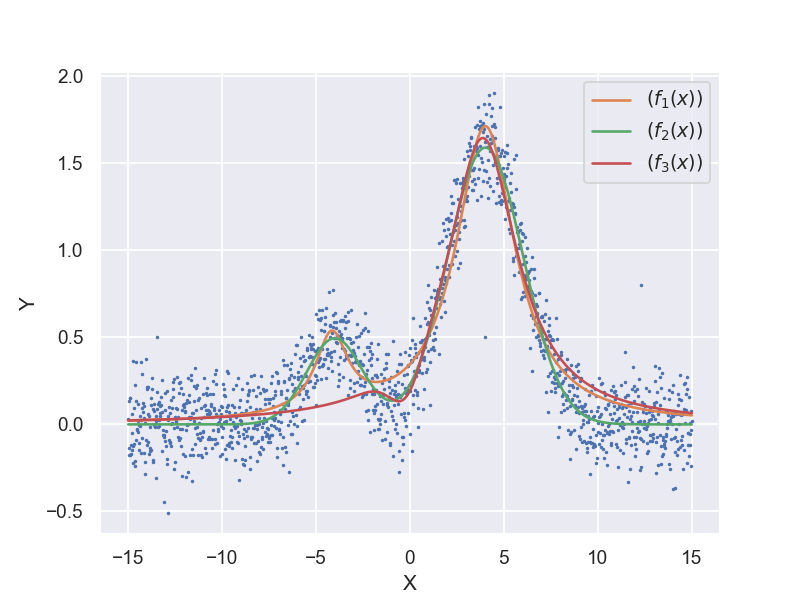

0.4949583513642547 1.5903978261017857 1.496969543569409 2.010486290473632 -4.006020725496943 4.014547046756053


In [95]:
%matplotlib notebook
sns.set_theme()

lorenz_coef, lorenz_cov = curve_fit(lorenz2, x, y)
gauss_coef, gauss_cov = curve_fit(gauss2, x, y)
gausslorenz_coef, gausslorenz_cov = curve_fit(gausslorenz, x, y)

plt.scatter(x, y, s=1)

plt.plot(x, lorenz2(x, *lorenz_coef), color='C1', label=r'$(f_1(x))$')
plt.plot(x, gauss2(x, *gauss_coef), color='C2', label=r'$(f_2(x))$')
plt.plot(x, gausslorenz(x, *gausslorenz_coef), color='C3', label=r'$(f_3(x))$')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(*gauss_coef)

<IPython.core.display.Javascript object>


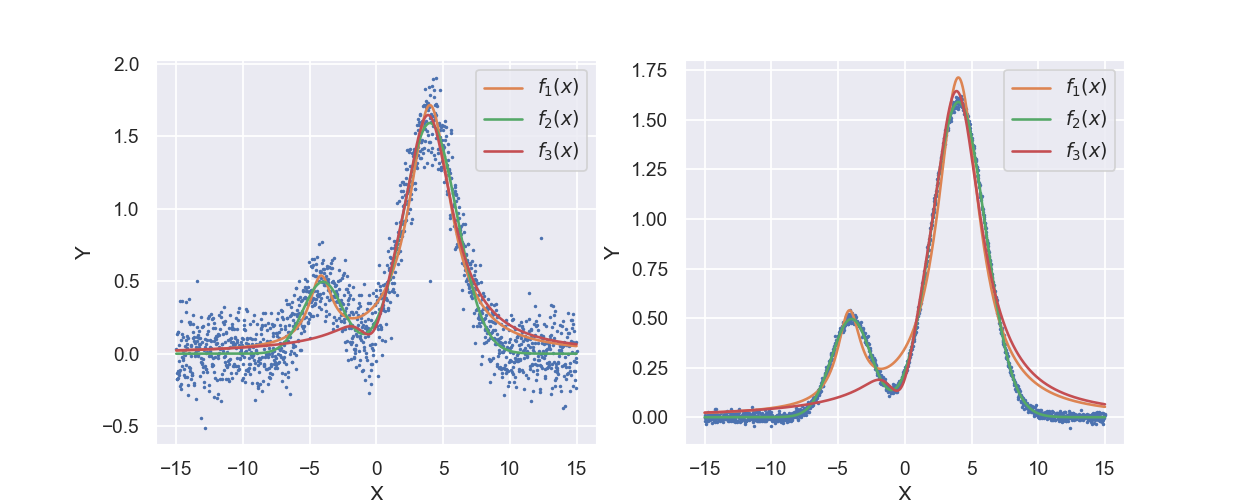

In [101]:
%matplotlib notebook
sns.set_theme()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

#1
ax1.scatter(x, y, s=1)

lorenz_coef, lorenz_cov = curve_fit(lorenz2, x, y)
gauss_coef, gauss_cov = curve_fit(gauss2, x, y)
gausslorenz_coef, gausslorenz_cov = curve_fit(gausslorenz, x, y)

ax1.plot(x, lorenz2(x, *lorenz_coef), color='C1', label=r'$f_1(x)$')
ax1.plot(x, gauss2(x, *gauss_coef), color='C2', label=r'$f_2(x)$')
ax1.plot(x, gausslorenz(x, *gausslorenz_coef), color='C3', label=r'$f_3(x)$')
ax1.legend()
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

#all
lorenz_coef_all, lorenz_cov_all = curve_fit(lorenz2, X, Y, p0=lorenz_coef)
gauss_coef_all, gauss_cov_all = curve_fit(gauss2, X, Y, p0=gauss_coef)
gausslorenz_coef_all, gausslorenz_cov_all = curve_fit(gausslorenz, X, Y, p0=gausslorenz_coef)

ax2.scatter(X, Y, s=1)

ax2.plot(X, lorenz2(X, *lorenz_coef), color='C1', label=r'$f_1(x)$')
ax2.plot(X, gauss2(X, *gauss_coef), color='C2', label=r'$f_2(x)$')
ax2.plot(X, gausslorenz(X, *gausslorenz_coef), color='C3', label=r'$f_3(x)$')

ax2.legend()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.savefig('3.pdf')

In [107]:
print(*np.round(np.sqrt(np.diag(lorenz_cov_all)), 3))
print(*np.round(np.sqrt(np.diag(gauss_cov_all)), 3))
print(*np.round(np.sqrt(np.diag(gausslorenz_cov_all)), 3))

0.01 0.013 0.016 0.044 0.011 0.03
0.002 0.001 0.006 0.002 0.006 0.002
0.019 0.014 0.104 0.033 0.091 0.022


In [109]:
print(*np.round(lorenz_coef_all, 3))
print(*np.round(gauss_coef_all, 3))
print(*np.round(gausslorenz_coef_all, 3))

1.712 0.462 1.91 1.044 3.992 -4.153
0.501 1.595 1.496 2.001 -3.999 3.997
-0.204 1.655 0.846 2.219 -0.134 3.863


In [126]:
output = np.array(['A1', 'A2', 'sigma1', 'sigma2', 'mu1', 'mu2', 'A1_conf', 'A2_conf', 'sigma1_conf', 'sigma2_conf', 'mu1_conf', 'mu2_conf'])
for file in os.listdir('Problem_23/'):
    dataset = np.loadtxt(os.path.join("Problem_23/", file), delimiter="\t")
    x = dataset[:, 0]
    y = dataset[:, 1]
    coef, cov = curve_fit(gauss2, x, y, p0=gauss_coef)
    cov = 2*np.sqrt(np.diag(cov))
    res = np.concatenate((coef, cov))
    output=np.vstack((output, np.round(res, 4)))

In [127]:
np.savetxt('Problem_23.csv', output, fmt="%s", delimiter=',')

In [128]:
output[1:].astype(np.float64)

array([[0.495 , 1.5904, 1.497 , ..., 0.0413, 0.1126, 0.0405],
       [0.5092, 1.5898, 1.4692, ..., 0.0424, 0.1121, 0.0417],
       [0.4851, 1.5928, 1.452 , ..., 0.0421, 0.1166, 0.0414],
       ...,
       [0.5117, 1.6087, 1.4874, ..., 0.0404, 0.109 , 0.0397],
       [0.4786, 1.5859, 1.5793, ..., 0.0424, 0.1214, 0.0414],
       [0.4936, 1.6178, 1.5697, ..., 0.0403, 0.1156, 0.0394]])

In [132]:
print(*np.round(gauss_coef_all, 3),*np.round(2*np.sqrt(np.diag(gauss_cov_all)), 3))
print(*np.round(np.mean(output[1:].astype(np.float64), axis=0), 3))

0.501 1.595 1.496 2.001 -3.999 3.997 0.003 0.003 0.011 0.004 0.011 0.004
0.502 1.595 1.497 2.001 -3.999 3.998 0.033 0.029 0.117 0.043 0.115 0.042
